# Radiant ML Hub 

Simple scripts for pulling data from Radiant ML Hub. 

### Requirements:
1. Make Radiant ML Hub Account: https://dashboard.mlhub.earth/

2. Get Radiant ML Hub API key from dashboard.

3. Install radiant-mlhub package for python: https://pypi.org/project/radiant-mlhub/ 

4. Run 'mlhub configure' in your environment, provide key.

---

API Reference:
https://radiant-mlhub.readthedocs.io/en/latest/

Data Catalog:
https://mlhub.earth/#datsets


In [1]:
import os, re
from radiant_mlhub import client, get_session

import lib.radiant as r

# Get API Key
session = get_session()

r.list_datasets()

Datasets in Radiant:
- 00. idiv_asia_crop_type:
	- Title:      A crop type dataset for consistent land cover classification in Central Asia
	- Image Sets: 1
	- Label Sets: 0
	- Size: 8.990513 MB

- 01. bigearthnet_v1:
	- Title:      BigEarthNet
	- Image Sets: 1
	- Label Sets: 1
	- Size: 71.311240007 GB

- 02. microsoft_chesapeake:
	- Title:      Chesapeake Land Cover
	- Image Sets: 3
	- Label Sets: 3
	- Size: 434.815691054 GB

- 03. ref_african_crops_kenya_02:
	- Title:      CV4A Kenya Crop Type Competition
	- Image Sets: 1
	- Label Sets: 1
	- Size: 3.739305754 GB

- 04. ref_african_crops_uganda_01:
	- Title:      Dalberg Data Insights Crop Type Uganda
	- Image Sets: 1
	- Label Sets: 1
	- Size: 63.745532087 GB

- 05. rti_rwanda_crop_type:
	- Title:      Drone Imagery Classification Training Dataset for Crop Types in Rwanda
	- Image Sets: 1
	- Label Sets: 2
	- Size: 28.837466783 GB

- 06. ref_african_crops_tanzania_01:
	- Title:      Great African Food Company Crop Type Tanzania
	- Imag

TypeError: '<' not supported between instances of 'NoneType' and 'float'

### Collection-Wise Operations



In [64]:
import radiant_mlhub as rhub

import lib.radiant as r

# Get API Key
session = rhub.get_session()

open_cities_test_id = 'open_cities_ai_challenge_test'
open_cities_root = './data/radiant_sets/open_cities_ai_challenge'

open_cities_test = rhub.Collection.fetch(open_cities_test_id)
#print(open_cities_test)


test_fp = open_cities_test.download(open_cities_root)




### Sample/Tile-Wise Operations

Taking a single tile from a single dataset, producing OSM labels.

Found that .tif images in Open Cities set have innaccurate coordinates.

In [131]:
import os, json, random, shutil
import shutil
import rasterio as rio

col_dir = "./data/radiant_sets/open_cities_ai_challenge/open_cities_ai_challenge_test"
first_folder = 'open_citiefs_ai_challenge_test_cd16b8'
building_folder = 'open_cities_ai_challenge_test_de338b'

col_json_fp = os.path.join(col_dir, 'collection.json')

sub_folders = [f for f in os.listdir(col_dir) if 'json' not in f] 



In [135]:
import lib.geotools as gt
with open(col_json_fp, 'r') as jsonfile:
    data = json.load(jsonfile)
    for key, item in data.items():
        print(f"- {key}: {type(item)}")
    print(data['extent'])
    #gt.show_dict(data, title='Collection JSON')

- description: <class 'str'>
- extent: <class 'dict'>
- id: <class 'str'>
- license: <class 'str'>
- links: <class 'list'>
- stac_extensions: <class 'list'>
- stac_version: <class 'str'>
- title: <class 'str'>
{'spatial': {'bbox': [[0.0, 0.0, 0.045, 0.045]]}, 'temporal': {'interval': [['2019-10-29T00:00:00+00:00', '2019-10-29T00:00:00+00:00']]}}


In [128]:
target_dir = os.path.join(col_dir, building_folder)

stac_fp = os.path.join(target_dir, 'stac.json')

with open(stac_fp, 'r') as stac_file:
    stac_data = json.load(stac_file)
    show_dict(data=stac_data, title="STAC Data")
    
    

STAC Data
---------
- assets (dict):
 - image (dict):
  - href (str): image.tif
  - title (str): GeoTIFF
  - type (str): image/tiff; application=geotiff; profile=cloud-optimized
- bbox (list): length=4 type=float
  [0.0, 0.0, 0.045, 0.045]
- geometry (dict):
 - coordinates (list): length=1 type=list
   [[[0.0, 0.0], [0.0, 0.045], [0.045, 0.045], [0.045, 0.0], [0.0, 0.0]]]
 - type (str): Polygon
- id (str): open_cities_ai_challenge_test_de338b
- links (list): length=2 type=dict
  [{'href': '../collection.json', 'rel': 'collection'}, {'href': '../collection.json', 'rel': 'parent'}]
- properties (dict):
 - datetime (str): 2019-10-29T00:00:00+00:00
- stac_version (str): 1.0.0-beta.2
- type (str): Feature



In [117]:
for i in range(3):
    rand_folder = random.choice(sub_folders)
    print(f"{i}. Selected File: '{rand_folder}'")

    sample_dir = os.path.join(col_dir, rand_folder)

    img_fp = os.path.join(sample_dir, 'image.tif')
    shutil.copy(img_fp, './data/tests/misc/sample_{:02}.tif'.format(i))
    raster = rio.open(img_fp)

    print("Raster Info:")
    print("------------")
    print("- Shape:", raster.shape)
    print("- Bands: {} of {}".format(raster.count, raster.dtypes[0]))
    print("- Bounds:", raster.bounds)
    print("- CRS:  ", raster.crs)
    print("- Affine:\n{}".format(raster.transform))
    print()



0. Selected File: 'open_cities_ai_challenge_test_9eb3ac'
Raster Info:
------------
- Shape: (1024, 1024)
- Bands: 4 of uint8
- Bounds: BoundingBox(left=166021.443, bottom=0.0, right=171011.443, top=5000.0)
- CRS:   EPSG:32631
- Affine:
| 4.87, 0.00, 166021.44|
| 0.00,-4.88, 5000.00|
| 0.00, 0.00, 1.00|

1. Selected File: 'open_cities_ai_challenge_test_de338b'
Raster Info:
------------
- Shape: (1024, 1024)
- Bands: 4 of uint8
- Bounds: BoundingBox(left=166021.443, bottom=0.0, right=171011.443, top=5000.0)
- CRS:   EPSG:32631
- Affine:
| 4.87, 0.00, 166021.44|
| 0.00,-4.88, 5000.00|
| 0.00, 0.00, 1.00|

2. Selected File: 'open_cities_ai_challenge_test_38f11b'
Raster Info:
------------
- Shape: (1024, 1024)
- Bands: 4 of uint8
- Bounds: BoundingBox(left=166021.443, bottom=0.0, right=171011.443, top=5000.0)
- CRS:   EPSG:32631
- Affine:
| 4.87, 0.00, 166021.44|
| 0.00,-4.88, 5000.00|
| 0.00, 0.00, 1.00|



In [109]:
import shapely.geometry as shp
import rasterio as rio
import geopandas as gpd

from pyproj import Proj, Transformer





geo_errors_raster = rio.open('./data/geo_errors/small/merged.tif')


osm_bounds(raster=raster)

Raster code: epsg:9001
PROJCS["UTM_Zone_15_Northern_Hemisphere",GEOGCS["GCS_GRS_1980_IUGG_1980",DATUM["D_unknown",SPHEROID["GRS80",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
01:
POLYGON ((409786 4604186, 409786 4606653, 407082 4606653, 407082 4604186, 409786 4604186))

02:
POLYGON ((-94.08228561402096 41.58427511264463, -94.08265686117949 41.60649215851742, -94.11510169838063 41.60618200585535, -94.11471933129856 41.58396520052312, -94.08228561402096 41.58427511264463))
min_x:
- src:       407082.0
- coupled:   0.0
- uncoupled: 0.0
- geometry:  -94.11510169838063
min_y:
- src:       4604186.0
- coupled:   84.94729650158709
- uncoupled: 0.0
- ge

### Get Labels from OSM 

Using `EPSG:32631`, get OSM labels in bounding box. 

In [79]:
import overpy
import overpass

# Get the API key (this uses default key but you can implement your own)
#api = overpass.API()
over = overpy.Overpass()

def get_buildings()
library = over.query('way(33.16558, -87.57477, 33.23129, -87.48422) ["amenity"="restaurant"]; (._;>;);out body;')

NameError: name 'overpy' is not defined

In [ ]:
collection_id = 'ref_landcovernet_v1_labels'
r.show_collection(collection_id)
print()
r.show_labels(collection_id)
items_pattern = re.compile(r'^/mlhub/v1/collections/(\w+)/items/(\w+)$')


### Working with a single dataset


In [35]:
import os, tarfile
import radiant_mlhub as rhub
import lib.radiant as r

# Get API Key
session = rhub.get_session()




# Sample set ID
tropical_id = "nasa_tropical_storm_competition"
kenya_id = "ref_african_crops_kenya_02"

fps = download_dataset(root='./data/radiant_sets', set_id=tropical_id)

- Downloading labels: 'nasa_tropical_storm_competition_test_labels'
- Extracting labels: 'nasa_tropical_storm_competition_test_labels'
- Downloading labels: 'nasa_tropical_storm_competition_train_labels'
- Extracting labels: 'nasa_tropical_storm_competition_train_labels'
- Downloading images: 'nasa_tropical_storm_competition_train_source'
- Extracting images: 'nasa_tropical_storm_competition_train_source'
- Downloading images: 'nasa_tropical_storm_competition_test_source'
- Extracting images: 'nasa_tropical_storm_competition_test_source'


In [26]:
import os, tarfile 

set_id = "nasa_tropical_storm_competition"

out_fp = "./data/radiant_sets/nasa_tropical_storm_competition/label/nasa_tropical_storm_competition_test_labels.tar.gz"

parent_dir, filename = os.path.split(out_fp)

# Remove tar.gz and set name if repeated.
tar_folder_name = filename[:-7]
tar_folder_name = tar_folder_name.replace(set_id, '').strip("_")

tar_folder = os.path.join(parent_dir, tar_folder_name)
if os.path.exists(tar_folder):
    print(f"Warning: Archive for this collection already extracted:\n'{tar_folder}'")
else:
    # Archive has not been extracted, send to folder. 
    tar_data = tarfile.open(out_fp)
    os.mkdir(tar_folder)
    tar_data.extractall(tar_folder)
    tar_data.close()

#print(sample_fp.replace())

In [34]:
import os, tarfile 

tropical_id = "nasa_tropical_storm_competition"
kenya_id = "ref_african_crops_kenya_02"

nasa_train_img =  "./data/radiant_sets/nasa_tropical_storm_competition/nasa_tropical_storm_competition_train_source.tar.gz"
kenya_train_img = "./data/radiant_sets/ref_african_crops_kenya_02/ref_african_crops_kenya_02_source.tar.gz"


out_nasa = './data/tests/nasa'
out_kenya = './data/tests/keyna'

for set_id, path in zip([tropical_id, kenya_id], [nasa_train_img, kenya_train_img]):
    with tarfile.open(path) as tar_data:
        print(set_id)
        tar_names = tar_data.getnames()
        print("total:", len(tar_names))
        for idx, fn in enumerate(tar_names):
            print("- {:02}: {}".format(idx, fn))
            if idx > 4: break

nasa_tropical_storm_competition
total: 281030
- 00: nasa_tropical_storm_competition_train_source
- 01: nasa_tropical_storm_competition_train_source/nasa_tropical_storm_competition_train_source_ojw_106
- 02: nasa_tropical_storm_competition_train_source/nasa_tropical_storm_competition_train_source_ojw_106/image.jpg
- 03: nasa_tropical_storm_competition_train_source/nasa_tropical_storm_competition_train_source_ojw_106/stac.json
- 04: nasa_tropical_storm_competition_train_source/nasa_tropical_storm_competition_train_source_ojw_106/features.json
- 05: nasa_tropical_storm_competition_train_source/nasa_tropical_storm_competition_train_source_ogw_019
ref_african_crops_kenya_02
total: 782
- 00: ref_african_crops_kenya_02_source
- 01: ref_african_crops_kenya_02_source/ref_african_crops_kenya_02_tile_01_20190721
- 02: ref_african_crops_kenya_02_source/ref_african_crops_kenya_02_tile_01_20190721/B05.tif
- 03: ref_african_crops_kenya_02_source/ref_african_crops_kenya_02_tile_01_20190721/B01.tif
- 0

### Clean Extraction Method

Radiant ML Hub downloads as zipped `.tar.gz` archive with really long filenames. Want to simplify and arrange in a uniform way for all sets. 

In [32]:
import os, tarfile 

def extract_dataset(root: str, set_id: str):
    """
    Extract collections in a dataset given it's parent directory and original id.

    Args:
        root (str):     Root folder for radiant hub.
        set_id (str):   String ID for dataset.
    Returns:
        None
    """
    set_folder = os.path.join(root, set_id)
    if not os.path.exists(set_folder):
        raise RuntimeError("Error: Can't extract collections in dataset folder, path does not exist:\n'{}'".format(set_folder))
    
    if (len(os.listdir(set_folder)) < 1)

    for archive in os.listdir(set_folder):
        
        

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-32-ed45fd25ff86>, line 4)

In [ ]:
import os, tarfile
import radiant_mlhub as rhub
import lib.radiant as r

# Get API Key
session = rhub.get_session()

def add_osm_labels(collection_dir: str) -> None:
    """ 
    Adds GDF labels from OSM to Radiant dataset.

    Args:
        collection_dir (str): Path to target folder containing an 
                                extracted collection from Radiant ML Hub. 
        format (str): Not implemented, may need a string to define the format of contained image data.
    
    Returns:
        None
    """
    # Run Checks on folder
    if not os.path.exists(collection_dir):
        raise RuntimeError("Collection path passed does not exist: '{}'".format(collection_dir))
    elif not os.path.isidr():
        raise RuntimeError("Collection path passed is not a directory: '{}'".format(collection_dir))
    elif (os.listdir(collection_dir) < 1):
        raise RuntimeError("Collection path passed is empty: '{}'".format(collection_dir))



In [38]:
nasa_collection_dir = "./data/radiant_sets/nasa_tropical_storm_competition/nasa_tropical_storm_competition_test_source"

sub_folders = os.listdir(nasa_collection_dir)

print("Total folders:", len(sub_folders))
for sub_folder in sub_folders:
    sub_dir = os.path.join(nasa_collection_dir, sub_folder)
    if not os.path.isdir(sub_dir):
        # Hit collection.json
        continue
    
    print("-",sub_folder)
    
    dir_contents = os.listdir(sub_dir)
    print("  - subfolder size:", len(dir_contents))
    print("  - subfolder entries:")
    for fname in dir_contents:
        print("  -", fname)

der size: 3
  - subfolder entries:
  - features.json
  - stac.json
  - image.jpg
- nasa_tropical_storm_competition_test_source_acd_165
  - subfolder size: 3
  - subfolder entries:
  - features.json
  - stac.json
  - image.jpg
- nasa_tropical_storm_competition_test_source_mtj_186
  - subfolder size: 3
  - subfolder entries:
  - features.json
  - stac.json
  - image.jpg
- nasa_tropical_storm_competition_test_source_dft_299
  - subfolder size: 3
  - subfolder entries:
  - features.json
  - stac.json
  - image.jpg
- nasa_tropical_storm_competition_test_source_ohj_128
  - subfolder size: 3
  - subfolder entries:
  - features.json
  - stac.json
  - image.jpg
- nasa_tropical_storm_competition_test_source_sqs_133
  - subfolder size: 3
  - subfolder entries:
  - features.json
  - stac.json
  - image.jpg
- nasa_tropical_storm_competition_test_source_jhp_213
  - subfolder size: 3
  - subfolder entries:
  - features.json
  - stac.json
  - image.jpg
- nasa_tropical_storm_competition_test_source_rtr

KeyboardInterrupt: 

Feature Data
------------
- storm_id (str): utr
- relative_time (str): 531002
- ocean (str): 1

Stac Data
---------
- assets (dict): dict_keys(['features', 'image'])
- bbox (list):
  - length: 4
  - type: float
- collection (str): nasa_tropical_storm_competition_test_source
- geometry (dict): dict_keys(['coordinates', 'type'])
- id (str): nasa_tropical_storm_competition_test_source_utr_244
- links (list):
  - length: 2
  - type: dict
- properties (dict): dict_keys(['anon:size', 'anon:warning', 'datetime'])
- stac_extensions (list):
  - length: 1
  - type: str
- stac_version (str): 1.0.0-beta.2
- type (str): Feature

Image Data
----------
- Bands: ('L',)
- BBox: (0, 0, 366, 366)


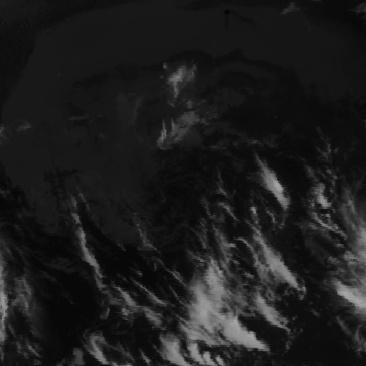

In [61]:
import os
import PIL.Image as Image
from IPython.display import display



nasa_collection_dir = "./data/radiant_sets/nasa_tropical_storm_competition/nasa_tropical_storm_competition_test_source"

sub_folders = os.listdir(nasa_collection_dir)

# features.json, stac.json, image.jpg
sample_dir = os.path.join(nasa_collection_dir, sub_folders[0])


# features.json
feat_fp = os.path.join(sample_dir, 'features.json')
with open(feat_fp, 'r') as f:
    feature_data = json.load(f)
    show_dict(feature_data, "Feature Data")

# stac.json
stac_fp = os.path.join(sample_dir, 'stac.json')
with open(stac_fp, 'r') as f:
    stac_data = json.load(f)
    show_dict(stac_data, "Stac Data")

# image.jpg
image_fp = os.path.join(sample_dir, 'image.jpg')
image = Image.open(image_fp)
print("Image Data")
print("----------")
print("- Bands:", image.getbands())
print("- BBox:", image.getbbox())

display(image)

In [46]:
import os
alphas = []
sub_zeros = []
for fldr in sub_folders:
    fp = os.path.join(nasa_collection_dir, fldr)
    #print(fldr[-3:])
    if not fp[-3:].isnumeric():
        print(fp)
        alphas.append(fp)
    elif (int(fp[-3:]) == 0):
        sub_zeros.append(fp)

./data/radiant_sets/nasa_tropical_storm_competition/nasa_tropical_storm_competition_test_source/collection.json


In [129]:
import os, json 
import lib.geotools as gt

json_fp = "./data/radiant_sets/nasa_tropical_storm_competition/nasa_tropical_storm_competition_test_source/collection.json"

with open(json_fp) as f:
    data = json.load(f)
    gt.show_dict(data)

print(data['extent'])


#for key, item in data.items():
    #print(f"{key}: {item}")

SyntaxError: closing parenthesis ')' does not match opening parenthesis '{' (geotools.py, line 60)